# In Class Exercise: 12/01/21

## Intro to Time Series Analysis

**1. Explore Google Trends https://trends.google.com/ . Find a topic of interest to you with more than a year of trend data, and export it.**

    - Import the data into a pandas dataframe
    - Decide whether ARIMA or SARIMA makes more sense for the dataset
    - Run either an ARIMA or SARIMA on it
    - Explain the results
    - Discuss your findings with your group and explain what trend someone else chose and why they chose the model they did

In [2]:
# Load pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

**Context**

I was an Epidemiologist before my current role, so I was interested in looking at trends for the search term, "Epidemiology." I was especially interested to see if there was a spike of searches during the start of the pandemic.

I searched for the past 5 years of data for this analysis.

In [3]:
# Read in csv file
Epi = pd.read_csv("GoogleTrends.csv")
Epi.head()

,Week,Epidemiology: (United States)
0,12/4/2016,48
1,12/11/2016,35
2,12/18/2016,22
3,12/25/2016,19
4,1/1/2017,22


**Initial Exploration**

The plot below looks like it *could* have been stationary, if I had selected a different time frame. However, because of the large peak, I will consider this to be non-stationary. 

There also appear to be some cyclical peaks and valleys, indicating that these data could be seasonal. Because of this seasonality, I am choosing to run a SARIMA model to fit my data.

<AxesSubplot:>

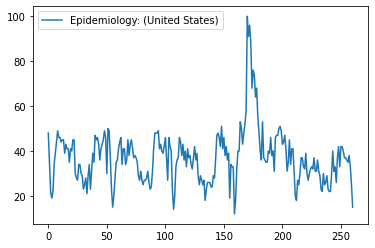

In [6]:
# Display a basic understanding of the data
Epi.plot()

In [10]:
# Import module to use SARIMAX function 
# The 'X' just means you can also use exogonous variables, if needed. 
     # exogonous = variables not affected by other variables
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
# define model configuration

# Trend elements
   # p = autoregression order = 1
   # d = difference order = 1
   # q = moving average order = 1
my_order = (1, 1, 1)

# Seasonal Elements
    # P = seasonal autoregression order = 2
    # D = seasonal difference order = 1
    # Q = seasonal moving average order = 0
    # m = time step for single seasonal period
           # This is weekly data and the cycles appear to be annual. 52 weeks in a year, so this value is 52.
my_seasonal_order = (2, 1, 0, 52)

In [24]:
# Run the model
model2 = SARIMAX(Epi['Epidemiology: (United States)'], order=my_order, seasonal_order=my_seasonal_order)

In [25]:
# Fit the model
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:       Epidemiology: (United States)   No. Observations:                  261
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 52)   Log Likelihood                -722.131
Date:                             Thu, 02 Dec 2021   AIC                           1454.261
Time:                                     12:54:40   BIC                           1470.949
Sample:                                          0   HQIC                          1461.009
                                             - 261                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1103      0.140      0.787      0.431      -0.165       0.385
ma.L1         -0.5038      0.125     -4.014      0.000      -0.750      -0.258
ar.S.L52      -0.6277      0.050    -12.505      0.000      -0.726      -0.529
ar.S.L104     -0.2739      0.112     -2.441      0.015      -0.494      -0.054
sigma2        54.3942      2.362     23.028      0.000      49.765      59.024
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1385.61
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                             1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# Make Prediction
forecast = results2.forecast()
forecast # predicted value of 17.81 search popularity over time.

261    21.481949
dtype: float64

**Explain Results**

- There were 261 observations because there were 261 weeks in my 5-year data series. 
- The AIC and BIC are both large numbers indicating that this model might not be an excellent fit. This is further emphasized by the log liklihood value of -722.13
- If we were to compare this log liklihood to another fit of the data, we could compare to see which fits better. The larger value would be the better fit.
- The autoregressive lag variable (ar.LI) is likely not significant because the p-value is 0.43 and the confidence interval crosses zero
- All other variables are significant (if aplha is set to 0.05), as they have p-values below 0.05 and the confidence intervals do not cross zero
- Sigma2 is just the error term
- We can look at the Ljung-Box test to see if the errors in our model are just 'white noise'
    - The p-value for this is above 0.05 (0.97), so we can NOT reject the null that the errors are just white noise
- We also have a p-value of nearly 0 for our heteroskedasticity. This poses another issue for our forecasting. Because the p-value is below 0.05, we cannot reject the null hypothesis. Basically, the variance of our errors do not remain constant over the course of the model. This is bad for predictions. 
- According to the Jarque-Bera test, which also has a p-value close to zero, our data are not normally distributed. In fact, we have a positive skew (1.16) and the kurtosis is a large value, indicating skewness and outliers. This is likely due to that one peak in March 2020

**Conclusion**

The seasonal model, as defined above it likely not the best fit for modeling and forecasting the search term "Epidemiology." It is likely that we would need to somehow adjust for that large peak in March of 2020 before running this model to better predict.

**2. What is a fourier transform? Perform one on y = np.cos(x/2), and both show (with code) and explain the key elements.**

A fourier transform helps convert time series signals into a frequency format. By doing this, we can parse different sound waves from each other. This can tell us how often each frequency occured over that time frame.

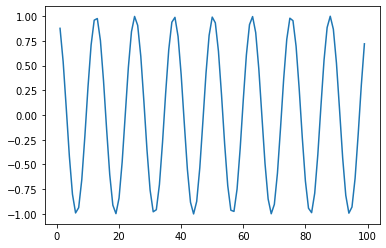

In [9]:
# Load necessary libraries
import numpy as np
from scipy import signal

# Plot initial graph without the transform
x = np.arange(1,100,1)
y = np.cos(x/2)
plt.plot(x,y)
plt.show()

Because we are just plotting a cosine wave (as opposed to several waves with different wave lengths), we only have one actual frequency to plot. This is displayed in the one peak/spike that we see. Only one frequency has a high intensity.

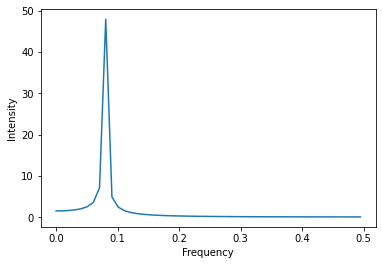

In [14]:
# Conduct the fourier transform
transform = np.abs(np.fft.rfft(y))

# Get the frequency to be able to plot
freqs = np.fft.rfftfreq(len(y))

# Plot frequency as x variable and intensity as y variable
plt.plot(freqs,transform)

# Label our axes
plt.xlabel('Frequency')
plt.ylabel('Intensity')

# Display our plot
plt.show()